In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def plot_cores_vs_speed(df):
    N = [8,16,32,64,128,512,1024]
    plt.figure(figsize=(5,5))
    for n in N:
        a = df.loc[df[0] == n]
        sum_df = a.groupby([1]).sum()
        sum_df[4] = sum_df[4]/10
        speedup = []
        cores = [1,2,3,4]
        vals = sum_df[3].values
        vals2 = sum_df[4].values
        for i in range(1,len(vals)):
            speedup.append(vals2[0]/vals2[i])
        plt.plot(cores,speedup,label=n)
        plt.grid(True)
        print(n , speedup[len(speedup)-1])
    plt.xlabel('Number of cores')
    plt.ylabel('Speedup')
    plt.title('Number of cores v/s Speedup for fixed problem size')
    plt.legend()
    plt.show()

In [28]:
def calculate_serial_parallel_fraction(df):
    N = [32,64,128,512,1024]
    for n in N:
        a = df.loc[df[0] == n]
        sum_df = a.groupby([1]).sum()
        sum_df[5] = sum_df[5]/10
        vals = sum_df[4].values
        print(n,round(vals[0],7))

ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

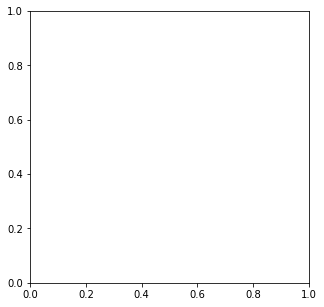

In [13]:
df = pd.read_csv('matrix_multiplication-middle/combined_logs.csv',header=None)
# print(df)
df[4] = df[2] + df[4]
df[3] = df[2] + df[3]
# print(df)
plot_cores_vs_speed(df)
# df = pd.read_csv('trapezoidal-private/combined_logs.csv',header=None)
# plot_cores_vs_speed(df)
# df = pd.read_csv('pi_using_series-critical/combined_logs.csv',header=None)
# plot_cores_vs_speed(df)
# df = pd.read_csv('vector-static/combined_logs.csv',header=None)
# plot_cores_vs_speed(df)
# df = pd.read_csv('vector-dynamic/combined_logs.csv',header=None)
# plot_cores_vs_speed(df)

In [29]:
df = pd.read_csv('matrix_multiplication-block_size32/combined_logs.csv',header=None)
df[4] = df[4] + df[2]
df[3] = df[3] + df[2]
df[5] = (df[3] - df[4]) / df[3]
calculate_serial_parallel_fraction(df)

32 0.0016452
64 0.0126015
128 0.1075826
512 6.5143214
1024 58.3851918


In [7]:
df

,0,1,2,3,4
0,16,0,0,0.000100,0.000033
1,32,0,0,0.000336,0.000260
2,64,0,0,0.002121,0.002019
3,128,0,0,0.016216,0.016001
4,256,0,0,0.145937,0.145368
5,512,0,1,0.197717,0.195858
6,1024,0,8,0.233936,0.228848
7,16,1,0,0.000074,0.000037
8,32,1,0,0.000667,0.000566
9,64,1,0,0.003944,0.003808
